In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
from zipfile import ZipFile

compressed_file_path = "/content/drive/MyDrive/Teeth DataSet.zip"
extracted_file_path = "/content/drive/MyDrive/TeethDataSet"
with ZipFile(compressed_file_path) as compFile:
    compFile.extractall(extracted_file_path)

In [ ]:
!ls /content/drive/MyDrive/TeethDataSet/Teeth_Dataset

Testing  Training  Validation


In [ ]:
train_path = "/kaggle/input/teethdiag/Teeth_Dataset/Training"
valid_path = "/kaggle/input/teethdiag/Teeth_Dataset/Validation"
test_path = "/kaggle/input/teethdiag/Teeth_Dataset/Testing"


In [ ]:
train_labels = os.listdir(train_path)
valid_labels = os.listdir(valid_path)
test_labels = os.listdir(test_path)

In [ ]:
print("Labels in train data", train_labels)
print("Labels in validation data", valid_labels)
print("Labels in test data", test_labels)

Labels in train data ['OC', 'CaS', 'OT', 'CoS', 'Gum', 'MC', 'OLP']
Labels in validation data ['OC', 'CaS', 'OT', 'CoS', 'Gum', 'MC', 'OLP']
Labels in test data ['OC', 'outputs', 'output', 'CaS', 'out', 'OT', 'CoS', 'Gum', 'MC', 'OLP']


In [ ]:
total_train_bytes = sum(os.path.getsize(os.path.join(train_path, label, image)) for label in train_labels for image in os.listdir(os.path.join(train_path, label)))
print('Total Train data size = ', round(total_train_bytes / (1024 * 1024), 2), "Megabytes")

Total Train data size =  26.5 Megabytes


In [ ]:
print("# of Samples of each labels : ")
for label in train_labels:
    print(f"{label} = ", len(os.listdir(os.path.join(train_path, label ))))

# of Samples of each labels : 

OT =  393

CoS =  450

MC =  540

CaS =  480

OC =  324

OLP =  540

Gum =  360


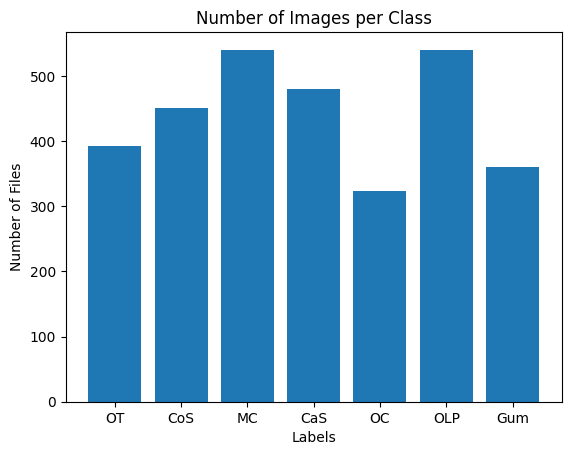

In [ ]:
# Compute the number of files for each label
sizes = [len(os.listdir(os.path.join(train_path, label))) for label in train_labels]

# Create the bar chart
plt.bar(train_labels, sizes)

# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Number of Files')
plt.title('Number of Images per Class')

# Show the plot
plt.show()

In [ ]:
#@title **Plot Function**

# Function to plot four random examples from each label
def plot_images(target_directory, num_examples=4, title="Data"):
    fig, axs = plt.subplots(len(labels), num_examples, figsize=(12, 10))
    fig.suptitle(title)

    # Iterate over each label
    for i, label in enumerate(labels):
        label_directory = os.path.join(target_directory, label)
        image_files = os.listdir(label_directory)
        np.random.shuffle(image_files)
        image_files = image_files[:num_examples]

        # Iterate over each image file
        for j, image_file in enumerate(image_files):
            image_path = os.path.join(label_directory, image_file)
            image = plt.imread(image_path)

            # Plot the image
            ax = axs[i, j]
            ax.imshow(image)
            ax.axis('off')

            # Add label as the title
            if j == 0:
                ax.set_title(label)

    fig.tight_layout()
    plt.show()

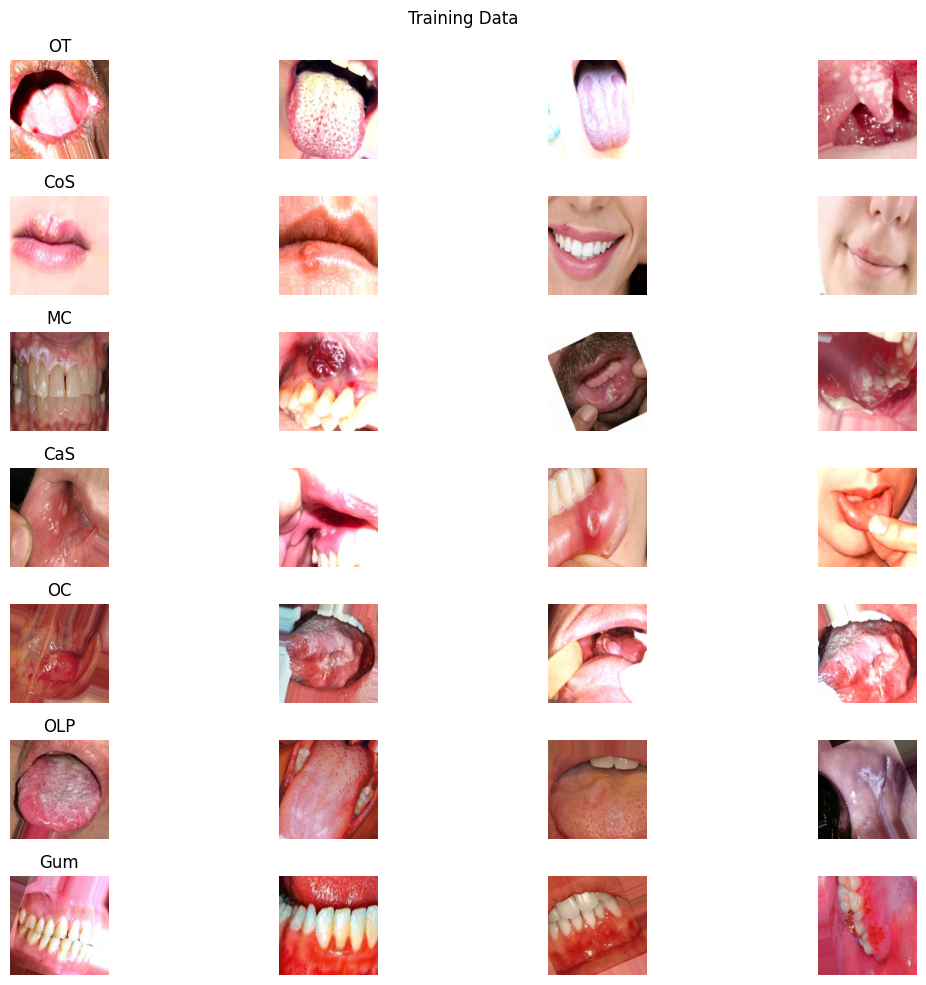

In [ ]:
labels = os.listdir(train_path)
plot_images(target_directory=train_path,
            num_examples = 4,
            title="Training Data" )

In [ ]:
#@title **Some Shapes of Images**
import matplotlib.image as mpimg
for label in os.listdir(train_path):
    print(f"------------------- {label} -----------------------")
    for ind in range(6):
        image_path = os.path.join(f"{train_path}/{label}", os.listdir(f"{train_path}/{label}")[ind])

        # Load image using matplotlib
        image = mpimg.imread(image_path)

        # Get shape of the image
        shape = image.shape
        print("Shape of the image:", shape)

------------------- OT -----------------------

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

------------------- CoS -----------------------

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

------------------- MC -----------------------

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

------------------- CaS -----------------------

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

S

In [ ]:
#@title **Exceptional Images**
import matplotlib.image as mpimg
exp_imag_paths = []
for label in os.listdir(train_path):
    print(f"------------------- {label} -----------------------")
    num_images = len(os.listdir(f"{train_path}/{label}"))
    for ind in range(num_images):
        image_path = os.path.join(f"{train_path}/{label}", os.listdir(f"{train_path}/{label}")[ind])

        # Load image using matplotlib
        image = mpimg.imread(image_path)

        # Get shape of the image
        shape = image.shape
        if shape != (256, 256, 3): # based on mode of shape of image
            exp_imag_paths.append(image_path)
            print("Shape of the image:", shape)

------------------- OT -----------------------

------------------- CoS -----------------------

------------------- MC -----------------------

------------------- CaS -----------------------

------------------- OC -----------------------

------------------- OLP -----------------------

------------------- Gum -----------------------

Shape of the image: (256, 256, 4)


(-0.5, 255.5, 255.5, -0.5)

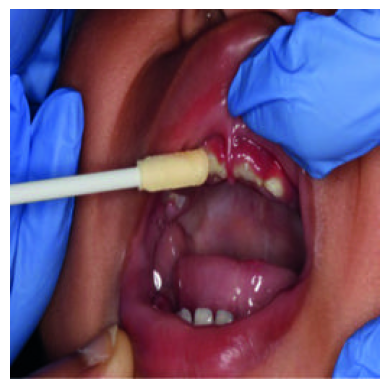

In [ ]:
image = plt.imread(exp_imag_paths[0])
plt.imshow(image)
plt.axis("off")

In [ ]:
import cv2
import tensorflow as tf

def preprocess_image(image_path, target_size=(256, 256, 3)):
    # Load the image using OpenCV (reads in BGR format)
    image = cv2.imread(image_path)

    # Resize the image if it's not already the target size
    if image.shape != target_size:
        image = cv2.resize(image, target_size)

    # Convert the image from BGR to RGB (Keras and TensorFlow expect RGB)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Normalize the pixel values to the range [0, 1]
    image = image / 255.0

    # Convert the image to a TensorFlow tensor
    image = tf.convert_to_tensor(image, dtype=tf.float32)

    return image

def preprocess_images(image_paths, target_size=(256, 256)):
    # Preprocess each image and stack them into a batch
    images = [preprocess_image(path, target_size) for path in image_paths]
    return tf.stack(images)

2024-08-21 16:12:49.105497: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-21 16:12:49.105747: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-21 16:12:49.269648: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
allTrain_imgPaths, labels = [], []
for label in train_labels:
  for image in os.listdir(os.path.join(train_path, label)):
    allTrain_imgPaths.append(os.path.join(train_path, label, image))
    labels.append(label)
images = preprocess_images(allTrain_imgPaths)
# Check the shape of the batch of images
print(images.shape)  # Should be (batch_size, 256, 256, 3)

(3087, 256, 256, 3)


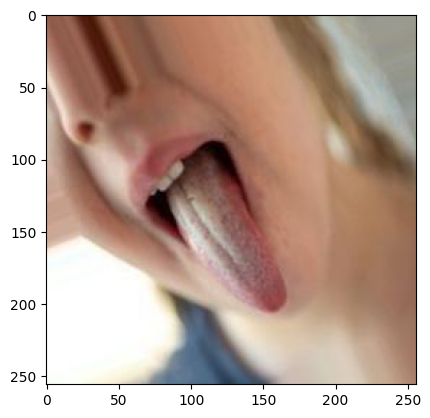

In [ ]:
plt.imshow(images[0])

In [ ]:
allValid_imgPaths, val_labels = [], []
for label in valid_labels:
  for image in os.listdir(os.path.join(valid_path, label)):
    allValid_imgPaths.append(os.path.join(valid_path, label, image))
    val_labels.append(label)
val_images = preprocess_images(allValid_imgPaths)
# Check the shape of the batch of images
print(images.shape)

(3087, 256, 256, 3)


In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.preprocessing import LabelEncoder


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Convert lists to NumPy arrays (validation set)
x_val = np.array(val_images)
y_val = np.array(val_labels)

print("Shape of validation images: ", x_val.shape)
print("Shape of validation labels: ", y_val.shape)

# Ensure that labels are strings if not already
if y_val.dtype != 'str':
    y_val = y_val.astype(str)

# Encode labels to integers (validation set)
label_encoder = LabelEncoder()
y_encoded_val = label_encoder.fit_transform(y_val)

# Convert labels to one-hot encoded format (validation set)
num_classes = len(np.unique(y_encoded_val))  # Number of unique classes
y_one_hot_val = tf.keras.utils.to_categorical(y_encoded_val, num_classes=num_classes)



Shape of validation images:  (1028, 256, 256, 3)
Shape of validation labels:  (1028,)


In [ ]:
# Convert lists to NumPy arrays (training set)
x_train = np.array(images)
y_train = np.array(labels)

print("Shape of training images: ", x_train.shape)
print("Shape of training labels: ", y_train.shape)

# Ensure that labels are strings if not already
if y_train.dtype != 'str':
    y_train = y_train.astype(str)

# Encode labels to integers (training set)
y_encoded_train = label_encoder.fit_transform(y_train)

# Convert labels to one-hot encoded format (training set)
y_one_hot_train = tf.keras.utils.to_categorical(y_encoded_train, num_classes=num_classes)



Shape of training images:  (3087, 256, 256, 3)
Shape of training labels:  (3087,)


In [ ]:
# Define the model
input_shape = (256, 256, 3)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Output layer with num_classes units
])



/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical crossentropy for one-hot encoded labels
              metrics=['accuracy'])



In [ ]:
# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=4,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the weights of the model from the best epoch
)

# Train the model with early stopping
batch_size = 32
epochs = 10
history = model.fit(
    x_train,
    y_one_hot_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_val, y_one_hot_val),
    callbacks=[early_stopping]
)



Epoch 1/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.1701 - loss: 2.3974 - val_accuracy: 0.2558 - val_loss: 1.8218
Epoch 2/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 222s 2s/step - accuracy: 0.2799 - loss: 1.8041 - val_accuracy: 0.3103 - val_loss: 1.7320
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - accuracy: 0.3651 - loss: 1.6586 - val_accuracy: 0.4076 - val_loss: 1.6123
Epoch 4/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 216s 2s/step - accuracy: 0.5060 - loss: 1.3325 - val_accuracy: 0.4942 - val_loss: 1.3552
Epoch 5/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.6284 - loss: 1.0116 - val_accuracy: 0.5253 - val_loss: 1.3311
Epoch 6/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.7074 - loss: 0.7955 - val_accuracy: 0.5370 - val_loss: 1.4393
Epoch 7/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - accuracy: 0.7938 - loss: 0.6051 - val_accuracy: 0.5525 - val_loss: 1.4287
Epoch 8/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 216s 2s/step - accuracy: 0.8638 - loss: 0.4121 - val_accuracy: 0.5730 - v

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(x_val, y_one_hot_val)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 595ms/step - accuracy: 0.4927 - loss: 1.4087
Validation Accuracy: 52.53%


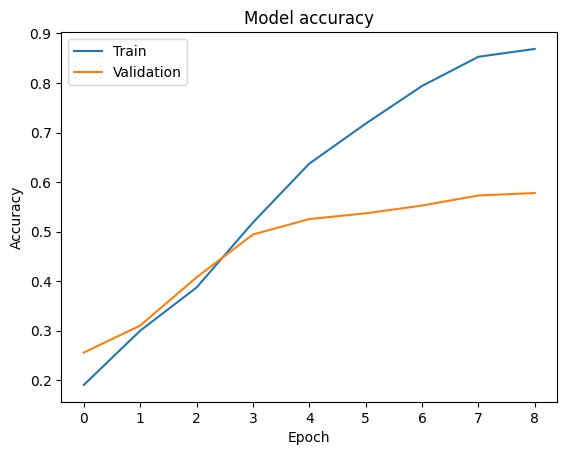

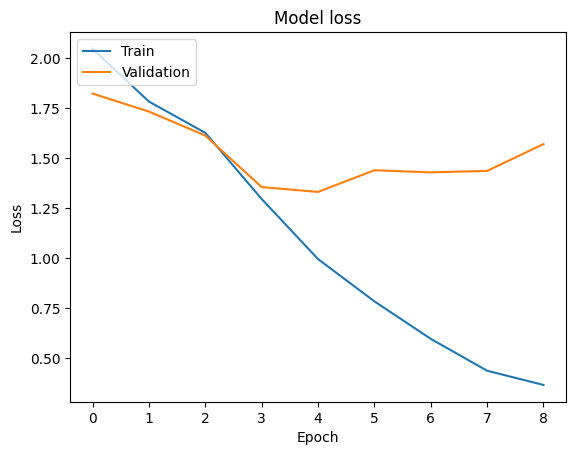

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Convert predicted labels to class indices
y_pred_classes = y_pred.argmax(axis=1)
y_pred_classes

array([3, 5, 6, ..., 3, 5, 0])

In [ ]:
y_true

array(['OC', 'OC', 'OC', ..., 'OLP', 'OLP', 'OLP'], dtype='<U3')

33/33 ━━━━━━━━━━━━━━━━━━━━ 19s 579ms/step
              precision    recall  f1-score   support

         CaS       0.45      0.41      0.43       160
         CoS       0.58      0.81      0.67       149
         Gum       0.54      0.59      0.56       120
          MC       0.38      0.51      0.44       180
          OC       0.60      0.29      0.39       108
         OLP       0.47      0.54      0.50       180
          OT       0.74      0.26      0.38       131

    accuracy                           0.50      1028
   macro avg       0.54      0.49      0.48      1028
weighted avg       0.52      0.50      0.49      1028



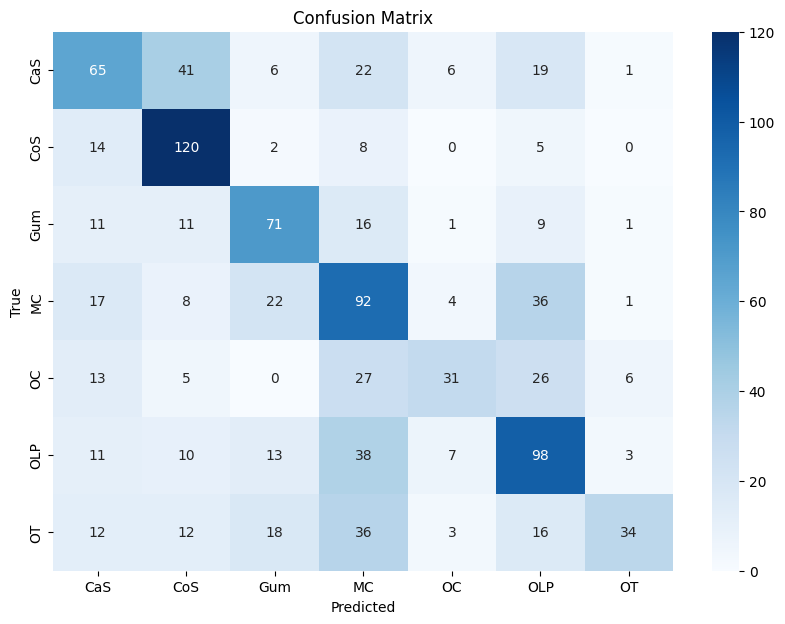

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict labels for validation data
y_pred = model.predict(x_val)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels

# Convert y_one_hot_val from one-hot encoding to class indices
y_true = np.argmax(y_one_hot_val, axis=1)

# Generate classification report
print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
